<a href="https://colab.research.google.com/github/sultanardian/kuliah/blob/main/data%20science/Data_Science_A_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Dataset/rekomendasi_tanaman.csv')
raw_data.sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label
1167,8,38,32,29.751508,46.737233,4.981817,91.405983,mangga
1999,120,60,15,22.318719,83.861300,7.288377,65.357470,kapas
1827,11,6,25,28.691648,96.652487,6.081568,178.963546,kelapa
534,36,57,16,28.614091,57.142188,8.292876,57.028917,kacang tunggak
735,25,76,17,31.741054,68.635254,7.241149,62.306173,kacang hitam
769,42,58,25,27.458536,62.900210,6.513621,69.460209,kacang hitam
1504,20,129,201,23.410447,91.699133,5.587906,116.077793,apel
414,27,72,17,28.980394,57.232652,6.347929,120.743566,kacang polong
1179,0,17,30,35.474783,47.972305,6.279134,97.790725,mangga
235,28,58,81,17.475010,16.543148,6.180427,93.350343,buncis


In [ ]:
data = raw_data.copy()

In [ ]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
data['label'].unique()

array(['beras', 'jagung', 'buncis', 'kacang merah', 'kacang polong',
       'kacang tunggak', 'kacang hijau', 'kacang hitam', 'kacang lentil',
       'delima', 'pisang', 'mangga', 'anggur', 'semangka', 'melon musk',
       'apel', 'jeruk', 'pepaya', 'kelapa', 'kapas', 'rami', 'kopi'],
      dtype=object)

In [ ]:
data.shape

(2200, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.skew()

N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64

In [ ]:
data.kurt()

N             -1.058240
P              0.860279
K              4.449354
temperature    1.232555
humidity       0.302134
ph             1.655581
rainfall       0.607079
dtype: float64

In [ ]:
feat_cols = data.drop('label', axis = 1).columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

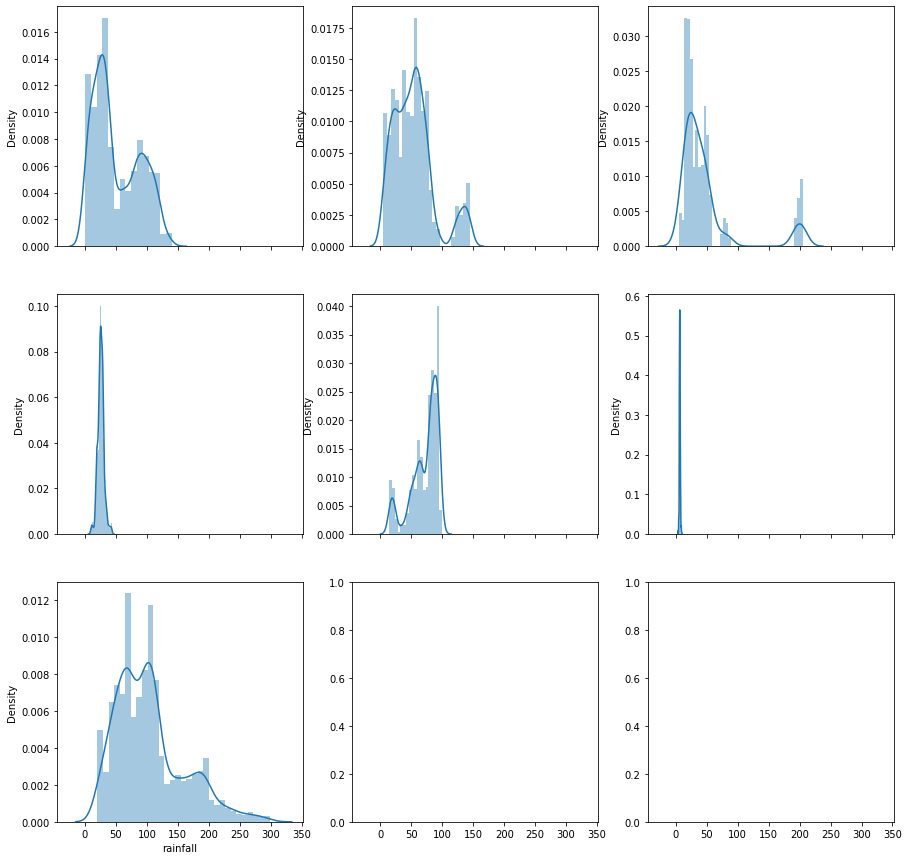

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (15, 15), sharex = True)

x, y = 0, 0
for col in feat_cols:
    sns.distplot(data[col], ax = ax[x, y])
    ax[x, y].set_xlabel(col)
    y += 1
    if y == 3:
        x += 1
        y = 0
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


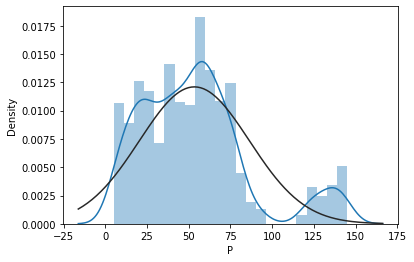

In [ ]:
from scipy.stats import norm
sns.distplot(data['P'], fit = norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


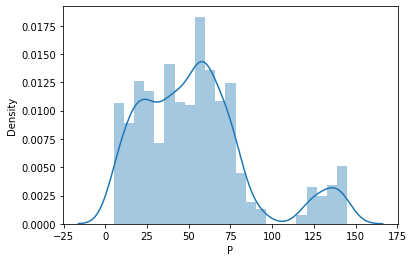

In [ ]:
sns.distplot(data['P'])

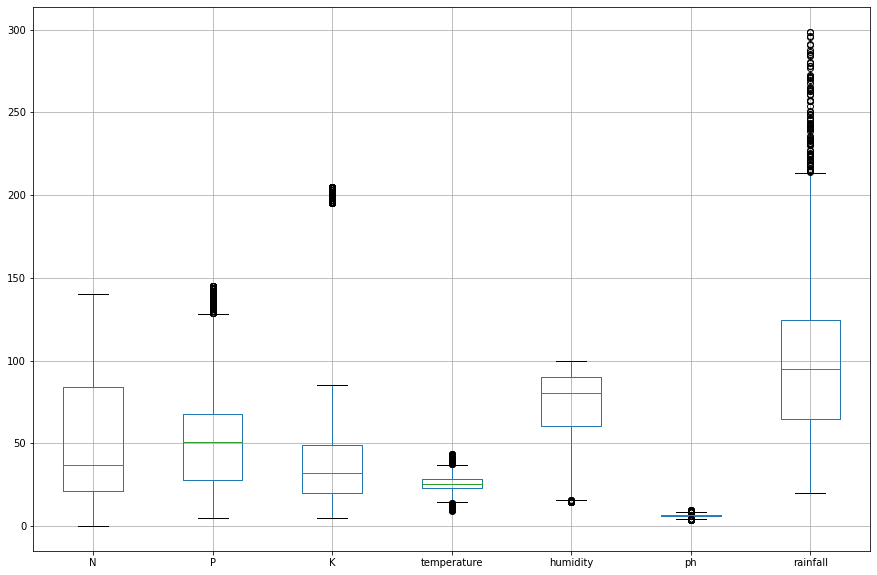

In [ ]:
plt.figure(figsize = (15, 10))
data.boxplot()

In [ ]:
data_pred = data[['humidity', 'ph', 'rainfall', 'label']]

In [ ]:
feat_cols = ['humidity', 'ph', 'rainfall']

Q1 = data_pred[feat_cols].quantile(.25)
Q3 = data_pred[feat_cols].quantile(.75)
IQR = Q3 - Q1

data_pred[feat_cols] = data_pred[feat_cols][~((data_pred[feat_cols] < Q1 - (IQR * 1.5)) | (data_pred[feat_cols] > Q3 + (IQR * 1.5)))]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
data_pred.isnull().sum()

humidity     30
ph           57
rainfall    100
label         0
dtype: int64

In [ ]:
data_pred.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_pred.isnull().sum()

humidity    0
ph          0
rainfall    0
label       0
dtype: int64

In [ ]:
data_pred.sample(10)

,humidity,ph,rainfall,label
1491,94.291195,6.067665,27.212440,melon musk
187,63.318020,6.330554,74.520820,jagung
29,80.644165,6.043305,197.979121,beras
331,24.540383,5.724242,105.412051,kacang merah
1715,94.607618,6.692156,172.478806,pepaya
1339,81.402974,6.940236,48.478333,semangka
831,61.184582,6.868882,53.139467,kacang lentil
983,89.021270,5.627186,106.160683,delima
1698,90.949297,7.871063,107.086209,jeruk
1773,92.251975,6.770385,88.130077,pepaya


In [ ]:
data_pred['label'].unique()

array(['beras', 'jagung', 'buncis', 'kacang merah', 'kacang polong',
       'kacang tunggak', 'kacang hijau', 'kacang hitam', 'kacang lentil',
       'delima', 'pisang', 'mangga', 'anggur', 'semangka', 'melon musk',
       'apel', 'jeruk', 'pepaya', 'kelapa', 'kapas', 'rami', 'kopi'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

data_pred['label'] = LabelEncoder().fit_transform(data_pred['label'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_pred['label'].unique()

array([ 2,  5,  3, 10, 11, 12,  7,  8,  9,  4, 19, 16,  0, 21, 17,  1,  6,
       18, 14, 13, 20, 15])

In [ ]:
from sklearn.model_selection import train_test_split

X = data_pred.drop('label', axis = 1)
y = data_pred['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print('Bentuk data training : \nX_train {}\ny_train {}'.format(X_train.shape, y_train.shape))
print('\nBentuk data testing : \nX_test {}\ny_test {}'.format(X_test.shape, y_test.shape))

Bentuk data training : 
X_train (1611, 3)
y_train (1611,)

Bentuk data testing : 
X_test (403, 3)
y_test (403,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10)
rfc2 = RandomForestClassifier(n_estimators = 50)
rfc3 = RandomForestClassifier(n_estimators = 100)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(rfc, X_train, y_train, cv = 3).mean()

0.8504034761018001

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(rfc2, X_train, y_train, cv = 3).mean()

0.8764742396027313

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(rfc3, X_train, y_train, cv = 3).mean()

0.8795779019242707

In [ ]:
print('RFC 1 : ', cross_val_score(rfc, X_train, y_train, cv = 3).mean())
print('\nRFC 2 : ', cross_val_score(rfc2, X_train, y_train, cv = 3).mean())
print('\nRFC 3 : ', cross_val_score(rfc3, X_train, y_train, cv = 3).mean())

RFC 1 :  0.8659217877094972

RFC 2 :  0.8783364369956548

RFC 3 :  0.8789571694599627


In [ ]:
rfc3.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rfc3.predict(X_test)
print('Accuracy Score :\n', accuracy_score(y_test, y_pred))
print('\nClassification Report :\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix :\n', confusion_matrix(y_test, y_pred))

Accuracy Score :
 0.8808933002481389

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.81      0.85      0.83        20
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         8
           4       0.65      0.73      0.69        15
           5       0.88      0.88      0.88        24
           6       0.63      0.63      0.63        19
           7       0.72      0.75      0.73        24
           8       0.84      0.94      0.89        17
           9       0.89      1.00      0.94        16
          10       1.00      1.00      1.00        21
          11       0.95      0.76      0.84        25
          12       1.00      0.75      0.86        12
          13       1.00      0.90      0.95        20
          14       1.00      1.00      1.00        14
          15       0.86      0.96      0.91        25
          16      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
